# Customer Churn Prediction Neural Network using Tensorflow/Keras

In [ ]:
# import necassar libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import kagglehub
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

## Load Dataset from kaggle

In [97]:
dataset_path = kagglehub.dataset_download('rjmanoj/credit-card-customer-churn-prediction')
csv_file_path = f'{dataset_path}/Churn_Modelling.csv'
df = pd.read_csv(csv_file_path)

Using Colab cache for faster access to the 'credit-card-customer-churn-prediction' dataset.


## Data Cleaning and Preprocessing

In [98]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [99]:
df.shape

(10000, 14)

In [100]:
df.isna().sum()

,0
RowNumber,0
CustomerId,0
Surname,0
CreditScore,0
Geography,0
Gender,0
Age,0
Tenure,0
Balance,0
NumOfProducts,0


In [101]:
df.duplicated().sum()

np.int64(0)

In [102]:
df.drop(columns=['RowNumber', 'CustomerId', 'Surname'], inplace=True)

In [103]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [104]:
df = pd.get_dummies(df,columns=['Geography', 'Gender'], dtype=int)

In [105]:
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,1,0,0,1,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,0,1,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,1,0,0,1,0
3,699,39,1,0.00,2,0,0,93826.63,0,1,0,0,1,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,0,1,1,0


In [106]:
df.drop(columns=['Gender_Female'], inplace=True)

In [107]:
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,1,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,0,1,0


In [108]:
X = df.drop(columns=['Exited'])
y = df['Exited']

In [109]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [110]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [111]:
X_train

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Male
9254,686,32,6,0.00,2,1,1,179093.26,1,0,0,1
1561,632,42,4,119624.60,2,1,1,195978.86,0,1,0,1
1670,559,24,3,114739.92,1,1,0,85891.02,0,0,1,1
6087,561,27,9,135637.00,1,1,0,153080.40,1,0,0,0
6669,517,56,9,142147.32,1,0,0,39488.04,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5734,768,54,8,69712.74,1,1,1,69381.05,1,0,0,1
5191,682,58,1,0.00,1,1,1,706.50,1,0,0,0
5390,735,38,1,0.00,3,0,0,92220.12,1,0,0,0
860,667,43,8,190227.46,1,1,0,97508.04,1,0,0,1


In [112]:
X_train_scaled

array([[ 0.35649971, -0.6557859 ,  0.34567966, ..., -0.57946723,
        -0.57638802,  0.91324755],
       [-0.20389777,  0.29493847, -0.3483691 , ...,  1.72572313,
        -0.57638802,  0.91324755],
       [-0.96147213, -1.41636539, -0.69539349, ..., -0.57946723,
         1.73494238,  0.91324755],
       ...,
       [ 0.86500853, -0.08535128, -1.38944225, ..., -0.57946723,
        -0.57638802, -1.09499335],
       [ 0.15932282,  0.3900109 ,  1.03972843, ..., -0.57946723,
        -0.57638802,  0.91324755],
       [ 0.47065475,  1.15059039, -1.38944225, ...,  1.72572313,
        -0.57638802,  0.91324755]])

In [113]:
X_train_scaled.shape

(8000, 12)

In [114]:
X_test_scaled.shape

(2000, 12)

In [115]:
y_train

,Exited
9254,0
1561,0
1670,1
6087,1
6669,1
...,...
5734,0
5191,0
5390,1
860,1


In [116]:
y_test

,Exited
6252,0
4684,0
1731,0
4742,0
4521,0
...,...
6412,1
8285,0
7853,1
1095,1


## Model Building and Training

In [117]:
# model = tf.keras.Sequential(
#     [
#         tf.keras.layers.Input(shape=(12,)),
#         tf.keras.layers.Dense(12, activation='sigmoid'),
#         tf.keras.layers.Dense(12, activation='sigmoid'),
#         tf.keras.layers.Dense(1, activation='sigmoid')
#     ]
# )
model = tf.keras.Sequential(
    [
        tf.keras.layers.Input(shape=(12,)),
        tf.keras.layers.Dense(20, activation='relu'),
        tf.keras.layers.Dense(12, activation='relu'),
        tf.keras.layers.Dense(1, activation='sigmoid')
    ]
)
# model = tf.keras.Sequential(
#     [
#         tf.keras.layers.Input(shape=(12,)),
#         tf.keras.layers.Dense(12, activation='relu'),
#         tf.keras.layers.Dense(12, activation='relu'),
#         tf.keras.layers.Dense(1, activation='relu')
#     ]
# )

In [118]:
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_12 (Dense)                │ (None, 20)             │           260 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 12)             │           252 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 1)              │            13 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 525 (2.05 KB)

 Trainable params: 525 (2.05 KB)

 Non-trainable params: 0 (0.00 B)

In [119]:
model.compile(
    loss=tf.keras.losses.BinaryCrossentropy,
    optimizer=tf.keras.optimizers.Adam(),
    metrics=['accuracy']
)

In [120]:
history = model.fit(X_train_scaled, y_train, epochs=100, validation_split=0.2)

Epoch 1/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7581 - loss: 0.5603 - val_accuracy: 0.8069 - val_loss: 0.4500
Epoch 2/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7974 - loss: 0.4468 - val_accuracy: 0.8194 - val_loss: 0.4217
Epoch 3/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8187 - loss: 0.4109 - val_accuracy: 0.8269 - val_loss: 0.4091
Epoch 4/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8328 - loss: 0.3987 - val_accuracy: 0.8344 - val_loss: 0.3992
Epoch 5/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8266 - loss: 0.4056 - val_accuracy: 0.8431 - val_loss: 0.3892
Epoch 6/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8486 - loss: 0.3763 - val_accuracy: 0.8487 - val_loss: 0.3799
Epoch 7/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8480 - loss: 0.3789 - val_accuracy: 0.8525 - val_loss: 0.3712
Epoch 8/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8549 - loss: 0.3619 - val_accu

## Model Evaluation and Prediction

In [121]:
y_log = model.predict(X_test_scaled)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step


In [131]:
from sklearn.metrics import roc_curve

# 1. Get probabilities
y_pred_prob = model.predict(X_test_scaled)

# 2. Calculate ROC curve metrics
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# 3. Calculate Youden's J statistic to find the best threshold
# J = Sensitivity + Specificity - 1 (or TPR - FPR)
J = tpr - fpr
ix = np.argmax(J) # Find the index of the highest J score
best_thresh = thresholds[ix]

print(f"Best Threshold: {best_thresh}")

# 4. Use this specific threshold for your final predictions
# y_pred_optimal = (y_pred_prob > best_thresh).astype(int)

49/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Best Threshold: 0.2554319500923157


In [132]:
y_log.min(), y_log.max(), y_log.mean()

(np.float32(0.0003786901), np.float32(0.99999875), np.float32(0.22199646))

In [133]:
y_pred = np.where(y_log>0.5, 1, 0)

In [134]:
y_pred.max(), y_pred.min()

(np.int64(1), np.int64(0))

In [135]:
accuracy_score(y_test, y_pred)

0.8575

In [136]:
y_pred_best_threshold = np.where(y_log>best_thresh, 1, 0)

In [137]:
accuracy_score(y_test, y_pred_best_threshold)

0.7905

In [143]:
history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

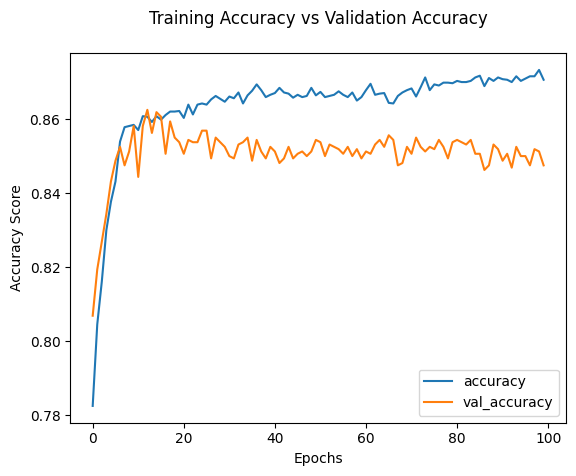

In [145]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.title("Training Accuracy vs Validation Accuracy\n")
plt.xlabel('Epochs')
plt.ylabel('Accuracy Score')
plt.legend()
plt.show()

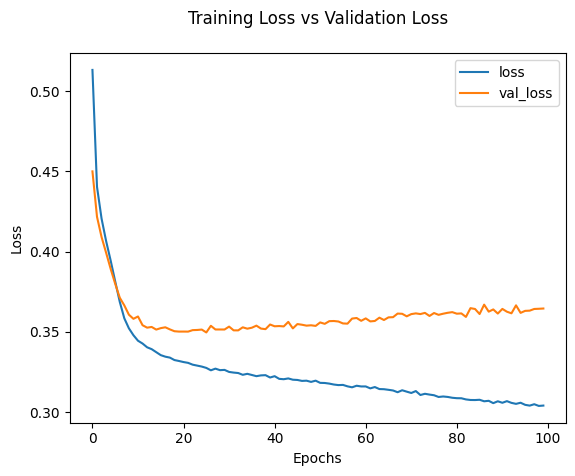

In [146]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.title("Training Loss vs Validation Loss\n")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()